Load libraries and dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
project_list = pd.read_excel("data/raw/DFO_and_ISC_report.xlsx")
project_list.head()

,project number,project_name_en,project_name_fr,RA_ID,description_en,description_fr,status_en,created_at,eaStartDate,responsible_authorities_en,responsible_authorities_fr
0,82935,North Lake Dredge Zone Expansion,Expansion de la zone de dragage de North Lake,DFO,Dredging of the entrance channel at North Lake...,Le dragage du chenal d&#39;entr&eacute;e &agra...,In progress,2021-08-27 14:03:28.737,2021-08-27,Fisheries and Oceans Canada,Pêches et Océans Canada
1,82934,Graham Pond Basin Dredge,Drague du bassin de l'étang Graham,DFO,The Department of Fisheries and Oceans Canada ...,"L&#39;&eacute;tang Graham, g&eacute;r&eacute; ...",In progress,2021-08-26 14:25:25.193,2021-08-26,Fisheries and Oceans Canada,Pêches et Océans Canada
2,82932,Atikameg Healing Shelter for Women and Children,Refuge de guérison d'Atikameg pour femmes et e...,ISC,Construction of Atikameg Healing Shelter for W...,Construction d&#39;un refuge de gu&eacute;riso...,In progress,2021-08-25 11:15:38.867,2021-08-25,Indigenous Services Canada,Services aux Autochtones Canada
3,82930,Peepeekisis Community Centre,Centre communautaire de Peepeekisis,ISC,The new Community Hub for Peepeekisis Cree Nat...,Le nouveau centre communautaire de la Nation c...,In progress,2021-08-24 18:00:40.273,2021-09-24,Indigenous Services Canada,Services aux Autochtones Canada
4,82929,Kehewin Lift Station Project,Projet de station de relèvement de Kehewin,ISC,Kehewin Cree Nation plans to construct a new l...,La Nation Crie de Kehewin pr&eacute;voit de co...,In progress,2021-08-24 17:20:09.440,2021-08-24,Indigenous Services Canada,Services aux Autochtones Canada


In [6]:
project_list.shape

(611, 11)

Take only projects that are completed.

In [9]:
project_list = project_list[project_list.status_en == "Completed"].copy()
project_list.shape

(389, 11)

Split the project list into DFO projects and ISC projects.  
For DFO, choose only projects where Fisheries and Oceans Canada is the sole responsible authority.
For ISC, choose only projects where ISC is the sole responsible authority.

In [16]:
DFO_reps = project_list[(project_list.RA_ID == "DFO") & 
                        (project_list.responsible_authorities_en == "Fisheries and Oceans Canada")].copy()
DFO_reps.head()

,project number,project_name_en,project_name_fr,RA_ID,description_en,description_fr,status_en,created_at,eaStartDate,responsible_authorities_en,responsible_authorities_fr
43,82825,Sharbot Lake Harbour Repairs 2021,Réparations du port de Sharbot Lake 2021,DFO,Central Frontenac Township intends to complete...,Le canton de Central Frontenac a l&#39;intenti...,Completed,2021-07-22 16:37:56.220,2021-07-22,Fisheries and Oceans Canada,Pêches et Océans Canada
45,82821,Michipicoten River Boat Launch 2021,Rampe de mise à l'eau de la rivière Michipicot...,DFO,The Municipality of Wawa intends to construct ...,La municipalit&eacute; de Wawa a l&#39;intenti...,Completed,2021-07-22 14:28:56.150,2021-07-22,Fisheries and Oceans Canada,Pêches et Océans Canada
47,82811,Thunder Bay (Current River) Harbour Rehabilita...,Réhabilitation du port de Thunder Bay (Current...,DFO,Fisheries and Oceans Canada intends to complet...,P&ecirc;ches et Oc&eacute;ans Canada a l&#39;i...,Completed,2021-07-21 14:29:14.647,2021-07-21,Fisheries and Oceans Canada,Pêches et Océans Canada
49,82806,Whitby West Pier Repairs 2021,Réparation de la jetée ouest de Whitby 2021,DFO,Fisheries and Oceans Canada intends to complet...,P&ecirc;ches et Oc&eacute;ans Canada a l&#39;i...,Completed,2021-07-20 09:17:01.060,2021-07-20,Fisheries and Oceans Canada,Pêches et Océans Canada
50,82801,Gros Cap Wharf Rehabilitation 2021,Réhabilitation du quai de Gros Cap 2021,DFO,Fisheries and Oceans Canada Small Craft Harbou...,"P&ecirc;ches et Oc&eacute;ans Canada,&nbsp;Dir...",Completed,2021-07-19 14:33:57.357,2021-07-19,Fisheries and Oceans Canada,Pêches et Océans Canada


In [19]:
ISC_reps = project_list[(project_list.RA_ID == "ISC") &
                        (project_list.responsible_authorities_en == "Indigenous Services Canada")].copy()
ISC_reps.head()

,project number,project_name_en,project_name_fr,RA_ID,description_en,description_fr,status_en,created_at,eaStartDate,responsible_authorities_en,responsible_authorities_fr
57,82779,Mishkeegogamang Ojibway Nation Broadband Tower...,Construction d'une tour à large bande pour la ...,ISC,Keewaytinook Okimakanak and KNet are working w...,Keewaytinook Okimakanak et KNet travaillent av...,Completed,2021-07-11 22:58:34.397,2021-07-11,Indigenous Services Canada,Services aux Autochtones Canada
64,81763,Tsuut'ina Nation Automotive Dealership Project,Projet de concessionnaire automobile de la nat...,ISC,"Construction of an approximately 76,000 square...",Le projet comprendra la construction d&#39;une...,Completed,2021-07-05 16:39:20.107,2021-07-05,Indigenous Services Canada,Services aux Autochtones Canada
67,81741,Family Services Building,Bâtiment des services aux familles,ISC,The project will include all preperation and c...,Le projet comprendra tous les travaux de pr&ea...,Completed,2021-06-24 16:57:59.023,2021-06-24,Indigenous Services Canada,Services aux Autochtones Canada
81,81712,Biigtigong Nishnaabeg New K4-8 School,Nouvelle école Biigtigong Nishnaabeg K4-8,ISC,The Project involves the construction of a new...,Le projet pr&eacute;voit la construction d&#39...,Completed,2021-06-16 22:13:41.117,2021-06-16,Indigenous Services Canada,Services aux Autochtones Canada
86,81699,"Grasswoods Reserve Septage Receiving Station, ...",Station de réception des boues de fosses septi...,ISC,The Proposed Project\r\n\r\nEnglish River Ente...,Le projet propos&eacute;\r\n\r\nEnglish River ...,Completed,2021-06-11 10:06:07.060,2021-06-11,Indigenous Services Canada,Services aux Autochtones Canada


In [23]:
print(DFO_reps.shape)
print(ISC_reps.shape)

(123, 11)
(212, 11)


There are now 123 DFO reports and 212 ISC reports to select from.

Do a word count on the project descriptions and add a column called wordcount to both dataframes.

<AxesSubplot:>

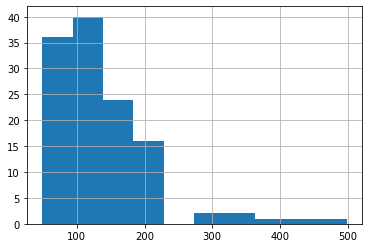

In [25]:
wordcount_DFO = DFO_reps["description_en"].str.split().str.len()
DFO_reps["wordcount"] = wordcount_DFO.values
DFO_reps["wordcount"].hist() # graph distribution of wordcount in the DFO reports

<AxesSubplot:>

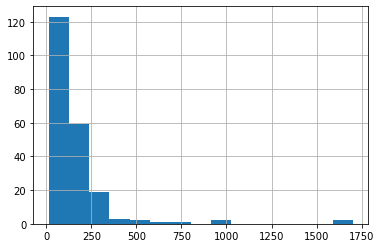

In [27]:
wordcount_ISC = ISC_reps["description_en"].str.split().str.len()
ISC_reps["wordcount"] = wordcount_ISC.values
ISC_reps["wordcount"].hist(bins=15)# graph distribution of wordcount in the ISC reports

Some of the ISC reports are much longer than any of the DFO or Parks reports. I will limit the random selection for both DFO and ISC to reports between 100 and 500 words, to ensure the selection of texts is comparable to the Parks texts.

Select the reports that are between 100 and 500 words.

In [28]:
DFO_100 = DFO_reps[(DFO_reps.wordcount > 100) & (DFO_reps.wordcount < 500)].copy()

ISC_100 = ISC_reps[(ISC_reps.wordcount > 100) & (ISC_reps.wordcount < 500)].copy()

Now randomly select 50 reports from each dataset.

In [29]:
#DFO_select = DFO_100.sample(n = 50)


#ISC_select = ISC_100.sample(n = 50)


Clean the HTML entities from the project descriptions.
First, define a function to strip the tags.

In [35]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.fed = []
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [33]:
#Try it out on a single cell of text.

sample_text = ISC_select.iloc[0,4]
print(sample_text)

Dene Tha&#39; First Nation is proposing to design and commission a water system for Bushe River Reserve #207, immediately east of the town High Level. The water system will consist of (1) A new regional water supply line to the reserve along the east boundary of Highway 58 and down to South Central Road to a new truckfill pumphouse and reservoir; (2) A new truckfill pumphouse and reservoir located on the south side of South Central Road, along with associated civil, structural, mechanical, electrical, process, instrumentation, and control works; (3) A water distribution system to service specific First Nation facilities and homes fed by the new pumphouse; and (4) Connecting the rental subdivision located immediately south of Highway 58 directly to the town of High Level water system.


In [36]:
clean_text = strip_tags(sample_text)
print(clean_text)

Dene Tha' First Nation is proposing to design and commission a water system for Bushe River Reserve #207, immediately east of the town High Level. The water system will consist of (1) A new regional water supply line to the reserve along the east boundary of Highway 58 and down to South Central Road to a new truckfill pumphouse and reservoir; (2) A new truckfill pumphouse and reservoir located on the south side of South Central Road, along with associated civil, structural, mechanical, electrical, process, instrumentation, and control works; (3) A water distribution system to service specific First Nation facilities and homes fed by the new pumphouse; and (4) Connecting the rental subdivision located immediately south of Highway 58 directly to the town of High Level water system.


In [39]:
# Now apply to entire column and send results to a new column called descript_clean

ISC_select["descript_clean"] = ISC_select["description_en"].apply(strip_tags)
DFO_select["descript_clean"] = DFO_select["description_en"].apply(strip_tags)

In [40]:
# Save the select reports.

#DFO_select.to_excel("data/processed/DFO_50select.xlsx")
#ISC_select.to_excel("data/processed/ISC_50select.xlsx")